<a href="https://colab.research.google.com/github/thiagotheiry05/Disciplinas-da-Graduacao/blob/main/INTELIG%C3%8ANCIA%20ARTIFICIAL/Unidade%203/Trabalho%20Final%20-%20Unidade%203/Trabalho_Final_Unidade3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IA aplicada a agentes inteligentes em problemas com tomadas de decisões

In [ ]:
# Instalando a biblioteca necessaria para a implementação
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=7ebdc16a28dc5d78cd5ddce57789ffbfae5c77ef98395e18a461cd8eac14b347
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
# Importando os pacotes
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [116]:
# Definir as variáveis de entrada e saída
velocidade = ctrl.Antecedent(np.arange(0,101,1), "velocidade")
distancia = ctrl.Antecedent(np.arange(0,251,1), "distancia")
acao = ctrl.Consequent(np.arange(-1, 2, 1), 'acao')

In [117]:
# Definir as funções de pertinência para as variáveis
velocidade['baixa'] = fuzz.trimf(velocidade.universe, [0,20,40])
velocidade['media'] = fuzz.trimf(velocidade.universe, [30,50,70])
velocidade['alta'] = fuzz.trimf(velocidade.universe, [60,80,100])

distancia['pequena'] = fuzz.trimf(distancia.universe, [1,60,100])
distancia['media'] = fuzz.trimf(distancia.universe, [70,120,170])
distancia['grande'] = fuzz.trimf(distancia.universe, [140,200,250])

acao['frear muito'] = fuzz.trimf(acao.universe, [-1, -1, 0])
acao['frear'] = fuzz.trimf(acao.universe, [-0.5, -0.5, 0])
acao['mantenha'] = fuzz.trimf(acao.universe, [-1, 0, 1])
acao['acelerar'] = fuzz.trimf(acao.universe, [0, 1, 1])

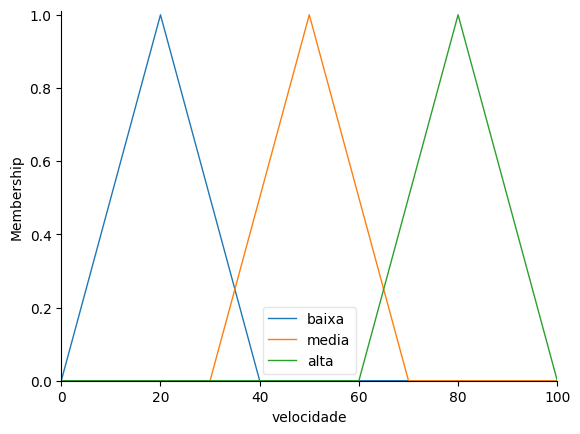

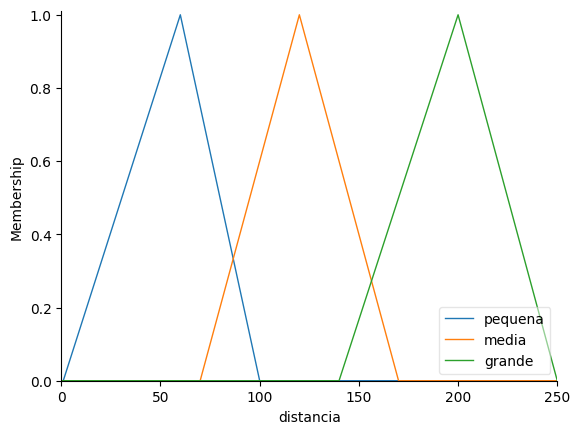

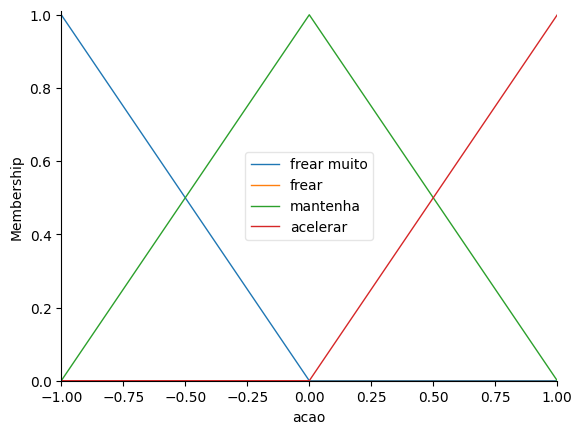

In [118]:
velocidade.view()
distancia.view()
acao.view()

In [119]:
# Definir as regras fuzzy
rule1 = ctrl.Rule(velocidade['baixa'] & distancia['pequena'], acao['frear'])
rule2 = ctrl.Rule(velocidade['baixa'] & distancia['media'], acao['mantenha'])
rule3 = ctrl.Rule(velocidade['baixa'] & distancia['grande'], acao['acelerar'])

rule4 = ctrl.Rule(velocidade['media'] & distancia['pequena'], acao['frear'])
rule5 = ctrl.Rule(velocidade['media'] & distancia['media'], acao['mantenha'])
rule6 = ctrl.Rule(velocidade['media'] & distancia['grande'], acao['acelerar'])

rule7 = ctrl.Rule(velocidade['alta'] & distancia['pequena'], acao['frear muito'])
rule8 = ctrl.Rule(velocidade['alta'] & distancia['media'], acao['frear'])
rule9 = ctrl.Rule(velocidade['alta'] & distancia['grande'], acao['mantenha'])

In [120]:
# Criar o sistema de controle fuzzy
sistema_controle = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [121]:
sistema.input['velocidade'] = 20
sistema.input['distancia'] = 150
sistema.compute()
acao_carro = sistema.output['acao']

In [122]:
# Determinar ação do carro
if acao_carro < -0.5:
    acao_texto = "Frear Muito"
elif acao_carro < 0:
    acao_texto = 'Frear'
elif 0 < acao_carro < 0.5:
    acao_texto = "Manter a velocidade atual"
else:
    acao_texto = "Acelerar"

# Imprimir a ação do carro
print("Ação do carro será:", acao_texto)

Ação do carro será: Manter a velocidade atual


In [123]:
# Exemplo de Acelerar
sistema.input['velocidade'] = 20
sistema.input['distancia'] = 170
sistema.compute()
acao_carro = sistema.output['acao']

# Determinar ação do carro
if acao_carro < -0.5:
    acao_texto = "Frear Muito"
elif acao_carro < 0:
    acao_texto = 'Frear'
elif 0 < acao_carro < 0.5:
    acao_texto = "Manter"
else:
    acao_texto = "Acelerar"

# Imprimir a ação do carro
print("Ação do carro será:", acao_texto)

Ação do carro será: Acelerar


In [124]:
# Exemplo de frear Muito
sistema.input['velocidade'] = 90
sistema.input['distancia'] = 15
sistema.compute()
acao_carro = sistema.output['acao']

# Determinar ação do carro
if acao_carro < -0.5:
    acao_texto = "Frear Muito"
elif acao_carro < 0:
    acao_texto = 'Frear'
elif 0 < acao_carro < 0.5:
    acao_texto = "Manter"
else:
    acao_texto = "Acelerar"

# Imprimir a ação do carro
print("Ação do carro será:", acao_texto)

Ação do carro será: Frear Muito


In [126]:
# Exemplo de frear
sistema.input['velocidade'] = 90
sistema.input['distancia'] = 150
sistema.compute()
acao_carro = sistema.output['acao']

# Determinar ação do carro
if acao_carro < -0.5:
    acao_texto = "Frear Muito"
elif acao_carro < 0:
    acao_texto = 'Frear'
elif acao_carro > 0:
    acao_texto = "Acelerar"
else:
    acao_texto = "Manter"

# Imprimir a ação do carro
print("Ação do carro será:", acao_texto)

Ação do carro será: Frear
